# Load Data :

In [8]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [9]:
import numpy as np
import cv2
import PIL.Image as Image

In [10]:
def read_pkl_to_dataframe(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return pd.DataFrame(data)

In [11]:
def load_rdt_data(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data

In [13]:
rdt_dataframes = [load_rdt_data(f'RDT/RDT_{i}.pkl') for i in range(2)]

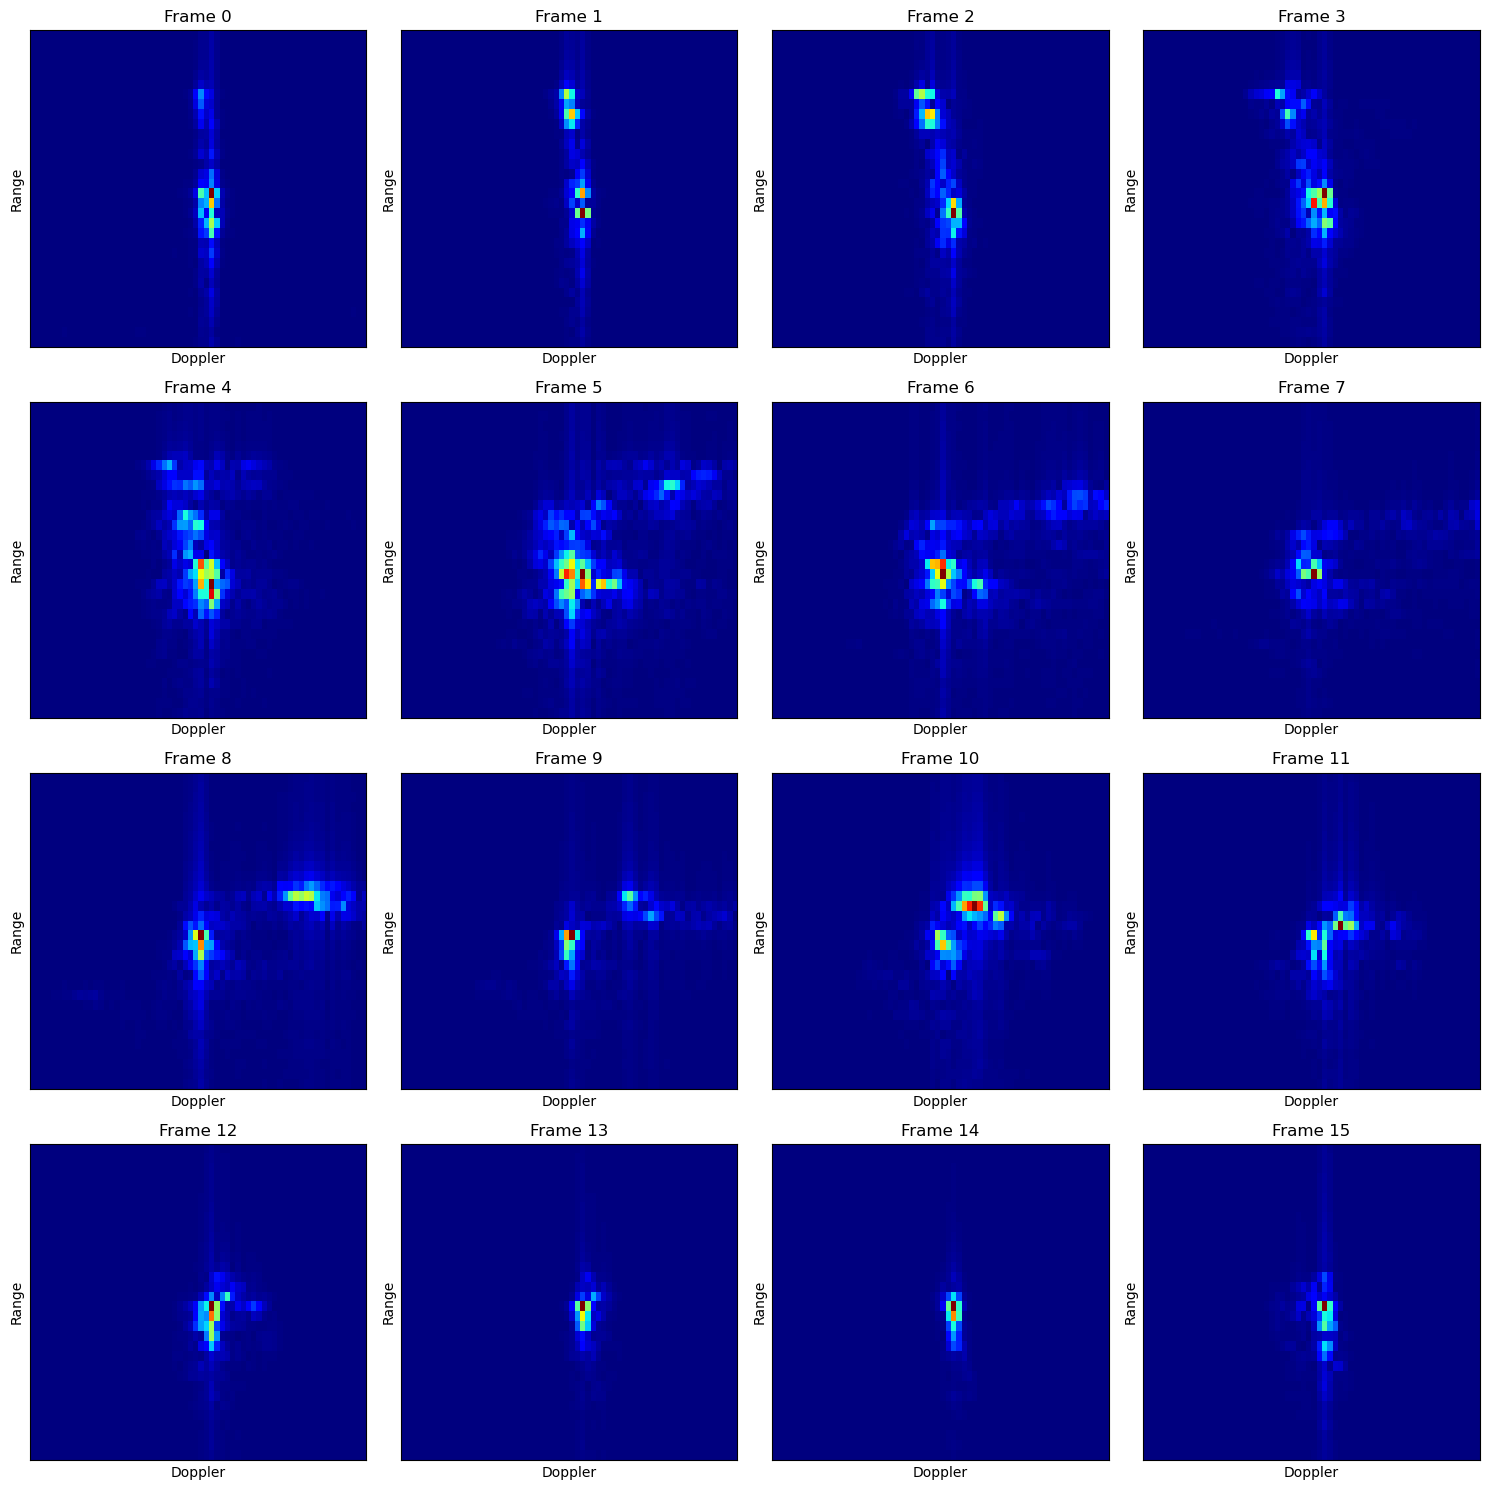

In [14]:
# Plotting the first 9 frames of RDT data
fig, axes = plt.subplots(4, 4, figsize=(15, 15))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(rdt_dataframes[0][i, :, :], cmap='jet', aspect='auto')
    ax.set_title(f'Frame {i}')
    ax.set_xlabel('Doppler')
    ax.set_ylabel('Range')
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

In [7]:
type(rdt_dataframes[0])

numpy.ndarray

In [17]:
with open('Labels/Labels/data_Y_70.pkl', 'rb') as f:
    data = pickle.load(f)

# Create a DataFrame with meal ID index
labels_df = pd.DataFrame({'Labels': data}, index=range(70))

In [18]:
labels_df

,Labels
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...
65,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
66,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
67,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
68,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [19]:


# 4. 7-fold cross validation id_list file
id_list_data = {}
for i in range(7):
    folder_name = str(i)
    train_ids = np.load(f'7-fold id_list/7-fold id_list/{folder_name}/train.npy')
    test_ids = np.load(f'7-fold id_list/7-fold id_list/{folder_name}/test.npy')
    valid_ids = np.load(f'7-fold id_list/7-fold id_list/{folder_name}/valid.npy')
    
    id_list_data[folder_name] = {
        'train_ids': train_ids,
        'test_ids': test_ids,
        'valid_ids': valid_ids
    }

# Splitting and preproceesing of data :

In [11]:
#valid_ids

In [20]:
train_ids

array([35, 32, 21, 64, 46, 24, 60, 44, 41, 61, 38, 39, 10, 30,  8, 65, 67,
       59, 55, 52, 58, 18,  7,  2, 25, 56, 31, 19, 16, 20, 34, 49, 45,  3,
       26, 29, 53, 66, 23,  9, 12, 57, 47, 50, 37,  0, 40, 43,  6, 13])

In [21]:
train_ids=train_ids[:1]
test_ids=test_ids[:1]

In [22]:
train_ids

array([35])

In [23]:
X_train = []
X_test = []
'''#X_valid = []
for idx in train_ids:
    X_train.append(rdt_dataframes[idx])
for idx in test_ids:
    X_test.append(rdt_dataframes[idx])
#for idx in valid_ids:
    #X_valid.append(rdt_dataframes[idx])'''
X_train = np.array(rdt_dataframes[0],dtype=object)
X_test = np.array(rdt_dataframes[1],dtype=object)
#X_valid = np.array(X_valid,dtype=object)


In [24]:
#X_train = np.concatenate([array for array in X_train])
X_train = np.array(X_train, dtype=np.float32)

In [25]:
#X_test = np.concatenate([array for array in X_test])
X_test = np.array(X_test, dtype=np.float32)

In [18]:
#X_valid = np.concatenate([array for array in X_valid])

In [26]:
X_train.shape

(23851, 32, 64)

In [27]:
X_test.shape

(29644, 32, 64)

In [21]:
#X_valid.shape

In [28]:
y_train = []
y_test = []
#y_valid=[]

#for row_num in train_ids:
y_train.append(labels_df.loc[0, 'Labels'])
#for row_num in test_ids:
y_test.append(labels_df.loc[1, 'Labels'])
#for row_num in valid_ids:
    #y_valid.append(labels_df.loc[row_num, 'Labels'])
y_train=np.concatenate(y_train)
y_test=np.concatenate(y_test)
#y_valid=np.concatenate(y_valid)

In [29]:
y_train.shape

(23851,)

In [30]:
y_test.shape

(29644,)

In [31]:
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=3)
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=3)

In [29]:
#y_valid.shape

# Model Bulding :

In [32]:
import tensorflow as tf
from keras.layers import Input,Dropout,Reshape,Permute,Conv1D,Conv3D, Permute,Flatten,Dense,Conv2D
from keras.models import Model,Sequential

In [31]:
model = Sequential()
def create_model(input_shape):
    # Input layer
    inputs = Input(shape=input_shape)

    # Shape variant layers
    x = Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 2), padding='same', activation='relu')(inputs)
    x = Conv2D(filters=32, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(x)
    x = Conv2D(filters=32, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(x)
    x = Conv2D(filters=32, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(x)

    # Shape invariant layers
    x = Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(x)
    x = Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(x)
    x = Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(x)
    x = Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(x)
    x = Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(x)

    # Flatten layer
    x = Flatten()(x)

    # Dense layers
    x = Dense(512, activation='relu')(x)
    x = Dense(256, activation='relu')(x)

    # Output layer
    outputs = Dense(3, activation='softmax')(x)  # Assuming 3 output classes

    # Define model
    model = Model(inputs=inputs, outputs=outputs)

    return model

# Input shape
input_shape = (32, 64, 1)  # Assuming range x doppler x time x channels

# Create the model
model = create_model(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 64, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 32)          9248      
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 32)          9248      
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 32)          9248  

In [32]:
model.fit(X_train,y_train_encoded,batch_size=1000)

35/35 [==============================] - 17s 90ms/step - loss: 0.8158 - accuracy: 0.7264


In [33]:
model.evaluate(X_test,y_test_encoded)

994/994 [==============================] - 14s 14ms/step - loss: 1.1288 - accuracy: 0.8268


[1.1288036108016968, 0.8268033266067505]